In [1]:
# import necessary pacakages
# strange issue: keep the import order to prevent matplotlib error
#  import matplotlib -> librosa -> pyplot -> librosa.display
import sys
import numpy as np
import matplotlib
import librosa
from matplotlib import pyplot as plt
import librosa.display

#from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

In [2]:
def getFIRFFT(H, order, winname=None):
    # H: NFFT/2+1
    NFFT = (len(H)-1)*2
    H = np.concatenate((H, H[-2:0:-1])) + np.zeros(NFFT)*(1j)
    h = np.fft.ifft(H, NFFT)
    order = min(NFFT-1, order)
    #h = np.concatenate((h[len(h)//2:], h[0:len(h)//2]))
    h = np.concatenate((h[(len(h)-order//2):], h[0:order//2+1]))
    if winname != None:
        win = librosa.filters.get_window(winname, order+1, fftbins=False)
        h = h*win
    return h.real

def drawFIRFFT(h, NFFT=512):
    plt.subplot(1,2,1)
    plt.plot(h)
    plt.xlabel('time (in samples)')
    plt.ylabel('amplitude')
    plt.subplot(1,2,2)
    NFFT = max(len(h), NFFT)
    xticks=np.linspace(0, 2, num=NFFT, endpoint=True)
    #plt.plot(xticks, np.fft.fft(a, NFFT).real)
    #plt.plot(xticks, np.fft.fft(a, NFFT).imag)
    plt.plot(xticks, np.abs(np.fft.fft(h, NFFT)))
    plt.xlabel('frequency (*pi radians)')
    plt.ylabel('magnitude')
    return h

getFIRFFT(np.arange(33), 10, 'hamming')

array([-0.02117231,  0.        , -0.28873613,  0.        , -5.91962644,
       16.        , -5.91962644,  0.        , -0.28873613,  0.        ,
       -0.02117231])

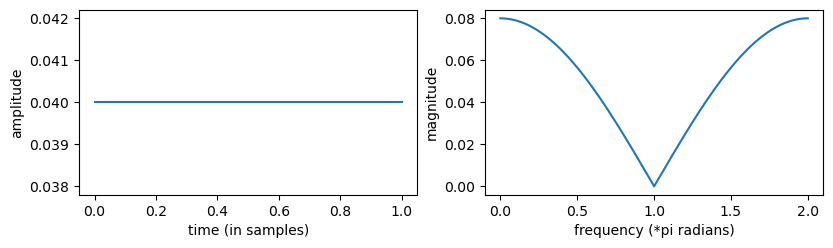

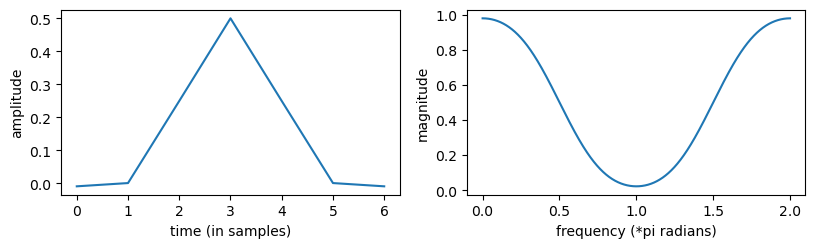

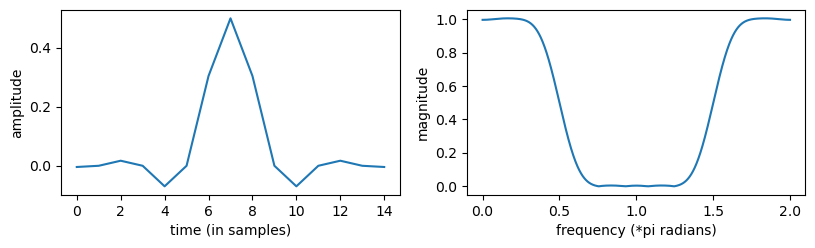

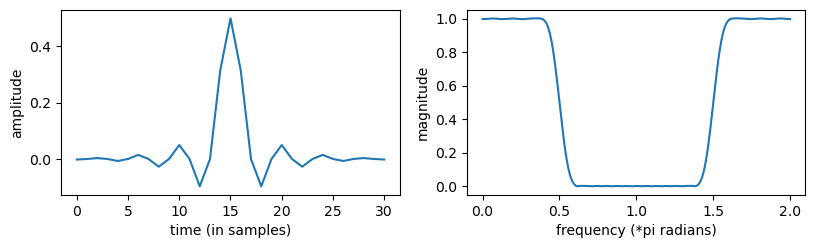

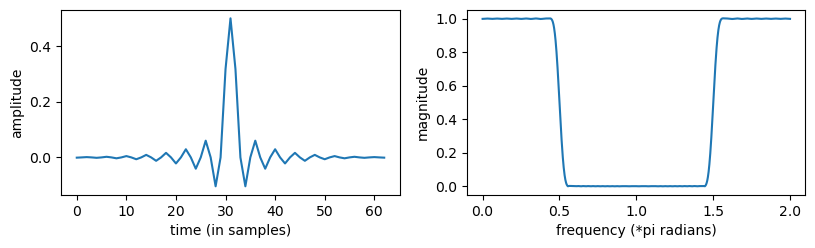

In [4]:
# lowpass 0.5, hamming window
# lowpass 0.5
FIG_SIZE = (8,3)
for order in [2,6,14,30,62]:
    H = [1.0]*(order//2) + [0.0]*(order//2)
    h = getFIRFFT(np.array(H), order, winname='hamming')
    plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
    drawFIRFFT(h, NFFT=2048)

Define the hanning window

In [69]:
def trapeziod(proportion_side, proportion_center, division, fs):
    
    if proportion_side*2 + proportion_center != 1:
        raise('proportion error')
        return 0
    
    samples_per_division = int(fs/division)
    
    left_samples = int(samples_per_division*proportion_side)
    mid_samples = int(samples_per_division*proportion_center)
    right_samples = int(samples_per_division*proportion_side)
    
    left_range = np.arange(0,np.pi/2,np.pi/(2*left_samples))
    right_range = np.arange(0,np.pi/2,np.pi/(2*left_samples))
    print(left_range.shape, right_range.shape)
    
    left_value = np.sin(left_range)
    mid_value = np.ones(mid_samples)
    right_value = np.square(np.cos(right_range))
        
    return np.concatenate((left_value, mid_value, right_value))

Define linear lowpass filter

In [59]:
def getlinFIR(div, file, order, start_fr, end_fr):
    FIR_list = []
    audio, fs = librosa.load(file, sr=None)
    total_time = len(audio)/fs
    total_div = int(total_time*div)
    print(total_div)
    for i in range(total_div):
        winname = 'hamming'
        H = [1.0]*int(i*order/total_div) + [0.0]*(order-int(i*order/total_div))
        h = getFIRFFT(np.array(H), order, winname)
        FIR_list.append(h)
    return FIR_list

In [60]:
lin_FIR = getlinFIR(100, './gjang-kdigits0-3.wav', 50, 0, 8000)


237


array([-5.89097222e-04,  1.04893648e-03, -1.43062894e-03,  1.61651126e-03,
       -1.39692783e-03,  5.47410817e-04,  1.03866932e-03, -3.21130231e-03,
        5.48332639e-03, -7.06442054e-03,  7.03403781e-03, -4.63065914e-03,
       -4.12971884e-04,  7.59081801e-03, -1.55058324e-02,  2.19877713e-02,
       -2.44615838e-02,  2.05091246e-02, -8.50219424e-03, -1.18520192e-02,
        3.92075976e-02, -7.06250615e-02,  1.01990036e-01, -1.28736197e-01,
        1.46721599e-01,  8.46938776e-01,  1.46721599e-01, -1.28736197e-01,
        1.01990036e-01, -7.06250615e-02,  3.92075976e-02, -1.18520192e-02,
       -8.50219424e-03,  2.05091246e-02, -2.44615838e-02,  2.19877713e-02,
       -1.55058324e-02,  7.59081801e-03, -4.12971884e-04, -4.63065914e-03,
        7.03403781e-03, -7.06442054e-03,  5.48332639e-03, -3.21130231e-03,
        1.03866932e-03,  5.47410817e-04, -1.39692783e-03,  1.61651126e-03,
       -1.43062894e-03,  1.04893648e-03, -5.89097222e-04])

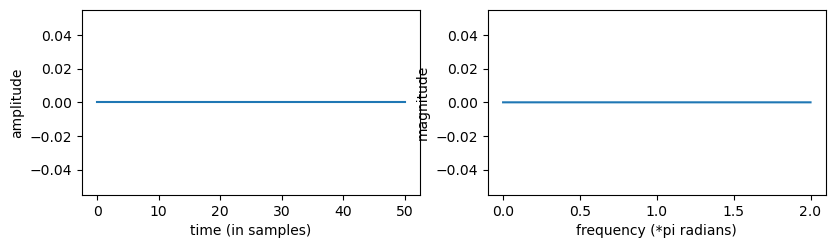

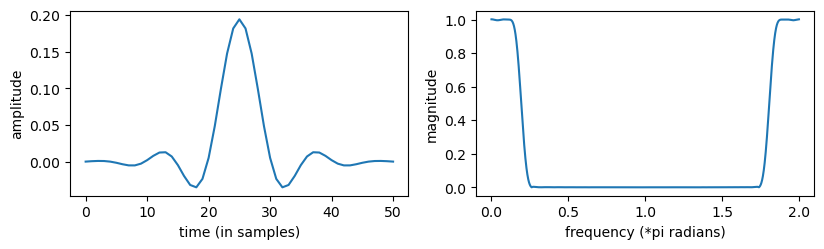

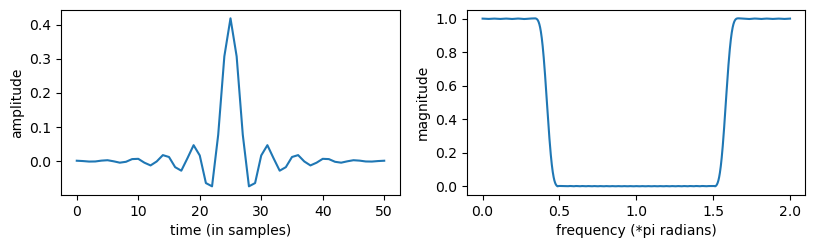

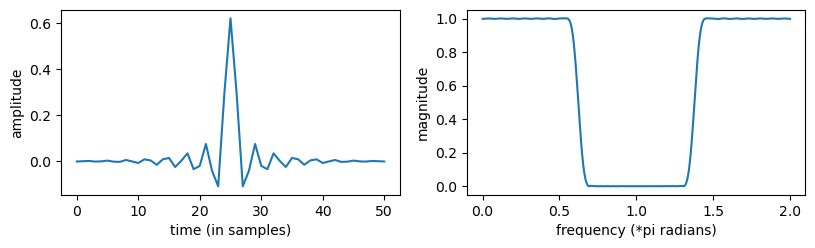

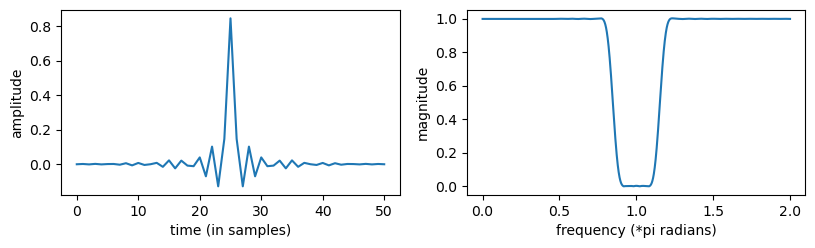

In [47]:
plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
drawFIRFFT(lin_FIR[0], NFFT=2048)
plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
drawFIRFFT(lin_FIR[50], NFFT=2048)
plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
drawFIRFFT(lin_FIR[100], NFFT=2048)
plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
drawFIRFFT(lin_FIR[150], NFFT=2048)
plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
drawFIRFFT(lin_FIR[200], NFFT=2048)

In [48]:
# returns decibel, with preventing 0 input
# note: input should be X(w) or x[n]
# dB = 20 log_10 (abs(x)) = 10 log_10 ( x^2 ) 
def decibel_sq_safe(x, epsilon=1e-10):
    return 10*np.log10(np.maximum(np.real(x*np.conj(x)),epsilon))

def drawspectrogram2(x, Nf, Ns=None, winname='hamming', minpercentile=80, isdbscale=True, isdraw=True):
    # Short-time Fourier transform with half-overlap 
    # Nf: analysis size
    # Ns: shift size 
    # NFFT: FFT size, power of 2
    if Ns==None: Ns=Nf//2
    num_frames = (len(x)-Nf)//Ns+1  # 마지막 채워지지 않은 프레임은 버린다. 구현에 따라 zero-padding해서 사용 가능
    NFFT = int(2**(np.ceil(np.log2(Nf))))   # Nf보다 크거나 같은 2의 거듭제곱을 NFFT 로 정의
    hNo = NFFT//2+1
    X = np.zeros((hNo,num_frames))
    
    # generate window
    if winname=='rect' or winname=='rectangular':
        win = np.ones(Nf)
    else:   # hamming, hann, etc.
        win = librosa.filters.get_window(winname, Nf, fftbins=True)
        
    # STFT
    for i in range(num_frames):
        y = np.fft.fft(win*x[(i*Ns):(i*Ns+Nf)], n=NFFT)
        y = y[:hNo]
        if isdbscale: y = decibel_sq_safe(y)
        else: y = np.abs(y)
        X[:,i] = y

    if isdraw:
        # 상위 80% 정도만 scale 한다. imshow의 vmin vmax 이용 
        vmax = np.max(X[:])
        vmin = np.percentile(X[:], minpercentile)
        specgram_axis = [0,float(len(x))/float(Fs),0,float(Fs)/2]
        plt.imshow(X, cmap=cmap_plot, aspect='auto', origin='lower', extent=specgram_axis, vmax=vmax, vmin=vmin)
        plt.xlabel('time (seconds)')
        plt.ylabel('frequency (Hz)')
    
    return X

In [55]:
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
x, Fs = librosa.load('./gjang-kdigits0-3.wav', sr=None, mono='True')
cmap_plot = plt.cm.bone_r # default colormap for spectrogram, gray, reversed

print(x,x.shape)

Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
NFFT = int(2**(np.ceil(np.log2(Nf))))   # Nf보다 크거나 같은 2의 거듭제곱을 NFFT 로 정의
print('Fs = %d, Ns = %d, Nf = %d, NFFT = %d' % (Fs, Ns, Nf, NFFT))

[-4.7912598e-03 -3.7231445e-03 -3.3569336e-03 ... -3.0517578e-05
 -8.8500977e-04  8.5449219e-04] (37952,)
Fs = 16000, Ns = 160, Nf = 320, NFFT = 512


237


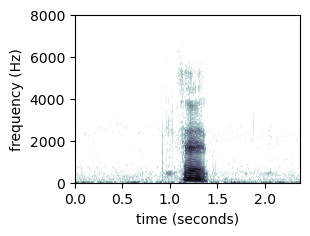

In [89]:
# original signal
plt.subplot(2,2,1)
X = drawspectrogram2(x, Nf, Ns, 'hamming')
print(len(lin_FIR))

(49770,)


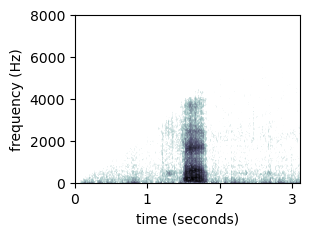

In [101]:
# divide x into frames
# the number of frames is len(FIR_list)

x_sampled = []
for i in range(len(lin_FIR)):
    x_sampled.append(x[i*160:(i+1)*160])


y_sampled = []
for i in range(len(x_sampled)):
    # keep the length of y_sampled[i] to be 160
    y_sampled.append(np.convolve(x_sampled[i], lin_FIR[i]))
    

y = np.concatenate(y_sampled)
print(y.shape)
# draw y
plt.subplot(2,2,2)
Y = drawspectrogram2(y, Nf, Ns, 'hamming')


(63,) (63,)


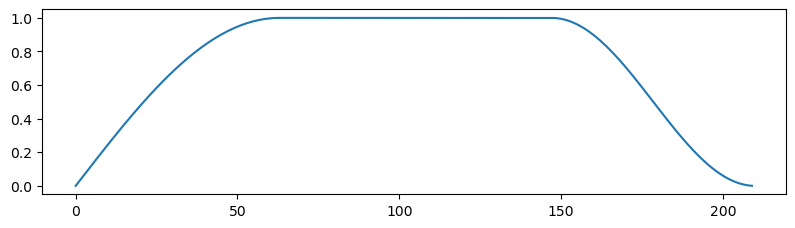

In [102]:
trap = trapeziod(0.3, 0.4, 100, 21000)
plt.figure(figsize=FIG_SIZE*np.array([1.2,0.8]))
plt.plot(trap)

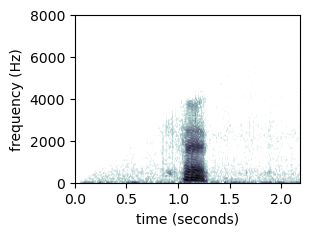

In [106]:
y_trapezoid = []
for i in range(len(y_sampled)):
    temp = np.multiply(y_sampled[i], trap)
    y_trapezoid.append(temp)

y = []
for i in range(len(y_trapezoid)-1):
    if i==0: y.extend(y_trapezoid[i][:63])
    y.extend(y_trapezoid[i][63:147])
    y_combined = y_trapezoid[i][147:]+y_trapezoid[i+1][:63]
    y.extend(y_combined)
y.extend(y_trapezoid[-1][63:])


plt.subplot(2,2,3)
Y = drawspectrogram2(y, Nf, Ns, 'hamming')

In [108]:
import scipy
scipy.io.wavfile.write('gjang-kdigits0-3-trapezoid.wav', Fs, np.array(y))